In [1]:
import os
import pandas as pd
from importlib import reload
import matplotlib
import matplotlib.pyplot as plt
import time
import numpy as np
import pickle

# from my_modules
import feature_extraction
import algorithms
import evaluate_performance

In [2]:
# set wd
os.chdir("C:/Users/alessandro/Documents/UZH/Thesis")

# Data Preparation: training

In [3]:
# import the data
train = pd.read_csv("code/context_analysis/datasets/spec_cont_train.csv") # DI
train_sc = pd.read_csv("code/context_analysis/datasets/spec_training.csv") # SC
train_mx = pd.read_csv("code/context_analysis/datasets/spec_mixed_train.csv") # mixed

In [4]:
print(train.shape)
train.head()

(6900, 12)


GroupName Sex  AgeDays  AgeYears     RecDate                     SourceFile  \
0   Rascals   M      199  0.545205  2015-11-14  VRRM182_RR_2_AM_14NOV2015.WAV   
1   Rascals   M      199  0.545205  2015-11-14  VRRM182_RR_2_AM_14NOV2015.WAV   
2   Rascals   M      199  0.545205  2015-11-14  VRRM182_RR_2_AM_14NOV2015.WAV   
3   Rascals   M      199  0.545205  2015-11-14  VRRM182_RR_2_AM_14NOV2015.WAV   
4   Rascals   M      199  0.545205  2015-11-14  VRRM182_RR_2_AM_14NOV2015.WAV   

      Code    ID                             CallFile  CallTime CallType  \
0  VRRM182  3243  VRRM182_RR_2_AM_14NOV2015_AD_39.WAV  3:49.000       DI   
1  VRRM182  3243  VRRM182_RR_2_AM_14NOV2015_AD_34.WAV  3:26.029       DI   
2  VRRM182  3243  VRRM182_RR_2_AM_14NOV2015_AD_35.WAV  3:29.553       DI   
3  VRRM182  3243  VRRM182_RR_2_AM_14NOV2015_AD_36.WAV  3:32.076       DI   
4  VRRM182  3243  VRRM182_RR_2_AM_14NOV2015_AD_37.WAV  3:42.159       DI   

                                                Path  
0  spectrograms\VRRM182\VRRM182_RR_2_AM_14NOV2015...  
1  spectrograms\VRRM182\VRRM182_RR_2_AM_14NOV2015...  
2  spectrograms\VRRM182\VRRM182_RR_2_AM_14NOV2015...  
3  spectrograms\VRRM182\VRRM182_RR_2_AM_14NOV2015...  
4  spectrograms\VRRM182\VRRM182_RR_2_AM_14NOV2015...

In [5]:
# random sorting
train = train.sample(frac=1, ignore_index=True, random_state=84)
train_sc = train_sc.sample(frac=1, ignore_index=True, random_state=84)
train_mx = train_mx.sample(frac=1, ignore_index=True, random_state=84)

### Data Distribution

In [6]:
print(f"N_training: {train.shape[0]}")
train.groupby(["Code"]).size()

N_training: 6900


Code
VRRM182    1380
VUKF016    1380
VUKF018    1380
VUKM017    1380
VZUF014    1380
dtype: int64

In [20]:
# random selections for train-test-split
np.random.seed(32)
idxs_train = [train.groupby("Code").sample(n=train.groupby(["Code"]).size().min()//10, random_state=np.random.randint(0, 100)).index.to_list() for i in range(10)]
idxs_train_sc = [train_sc.groupby("Code").sample(n=train_sc.groupby(["Code"]).size().min()//10, random_state=np.random.randint(0, 100)).index.to_list() for i in range(10)]
idxs_train_mx = [train_mx.groupby("Code").sample(n=train_mx.groupby(["Code"]).size().min()//10, random_state=np.random.randint(0, 100)).index.to_list() for i in range(10)]

# Data Preparation: testing

In [21]:
# import the data
test = pd.read_csv("code/context_analysis/datasets/spec_cont_test.csv") # DI
test_sc = pd.read_csv("code/context_analysis/datasets/spec_testing.csv") # SC
test_mx = pd.read_csv("code/context_analysis/datasets/mixed_test.csv") # mixed

In [22]:
print(train_sc.shape)
train_sc.head()

(6900, 12)


GroupName Sex  AgeDays  AgeYears     RecDate  \
0   Rascals   M      382  1.046575  2016-05-15   
1  Uberkatz   F      358  0.980822  2015-02-20   
2  Uberkatz   M      537  1.471233  2015-08-18   
3  Uberkatz   M      537  1.471233  2015-08-18   
4  Uberkatz   F      175  0.479452  2014-08-21   

                         SourceFile     Code    ID  \
0        VRRM182_RR_2_15MAY2016.WAV  VRRM182  3243   
1     VUKF018_UK_2_AM_20FEB2015.WAV  VUKF018  2987   
2     VUKM017_UK_2_AM_18AUG2015.WAV  VUKM017  2986   
3     VUKM017_UK_2_AM_18AUG2015.WAV  VUKM017  2986   
4  VUKF018_UK_1_AM_21August2014.WAV  VUKF018  2987   

                                        CallFile CallTime CallType  \
0        VRRM182_RR_2_15MAY2016_AD_39_aug_87.png  03:21.2       SC   
1    VUKF018_UK_2_AM_20FEB2015_AD_32_aug_103.png  05:14.6       SC   
2     VUKM017_UK_2_AM_18AUG2015_AD_24_aug_43.png  03:42.0       SC   
3     VUKM017_UK_2_AM_18AUG2015_AD_24_aug_26.png  03:42.0       SC   
4  VUKF018_UK_1_AM_21August2014_AD_44_aug_36.png  02:51.8       SC   

                                                Path  
0  spectrograms\VRRM182\augmented\general_identif...  
1  spectrograms\VUKF018\augmented\general_identif...  
2  spectrograms\VUKM017\augmented\general_identif...  
3  spectrograms\VUKM017\augmented\general_identif...  
4  spectrograms\VUKF018\augmented\general_identif...

In [23]:
print(test_sc.shape)
test_sc.head()

(10, 12)


GroupName Sex  AgeDays  AgeYears     RecDate                     SourceFile  \
0   Rascals   M      465  1.273973  2016-08-06     VRRM182_RR_1_06AUG2016.WAV   
1   Rascals   M      465  1.273973  2016-08-06     VRRM182_RR_1_06AUG2016.WAV   
2  Uberkatz   F      358  0.980822  2015-02-20  VUKF016_UK_2_AM_20FEB2015.WAV   
3  Uberkatz   F      358  0.980822  2015-02-20  VUKF016_UK_1_AM_20FEB2015.WAV   
4  Uberkatz   F      176  0.482192  2014-08-22  VUKF018_UK_2_AM_22AUG2014.WAV   

      Code    ID                             CallFile CallTime CallType  \
0  VRRM182  3243     VRRM182_RR_1_06AUG2016_AD_03.WAV  00:31.1       SC   
1  VRRM182  3243     VRRM182_RR_1_06AUG2016_AD_19.WAV  01:31.4       SC   
2  VUKF016  2985  VUKF016_UK_2_AM_20FEB2015_AD_11.WAV  05:28.9       SC   
3  VUKF016  2985  VUKF016_UK_1_AM_20FEB2015_AD_24.WAV  04:12.4       SC   
4  VUKF018  2987  VUKF018_UK_2_AM_22AUG2014_AD_16.WAV  01:16.7       SC   

                                                Path  
0  spectrograms\VRRM182\VRRM182_RR_1_06AUG2016_AD...  
1  spectrograms\VRRM182\VRRM182_RR_1_06AUG2016_AD...  
2  spectrograms\VUKF016\VUKF016_UK_2_AM_20FEB2015...  
3  spectrograms\VUKF016\VUKF016_UK_1_AM_20FEB2015...  
4  spectrograms\VUKF018\VUKF018_UK_2_AM_22AUG2014...

In [24]:
# random sorting
test = test.sample(frac=1, ignore_index=True, random_state=87)
test_sc = test_sc.sample(frac=1, ignore_index=True, random_state=84)
test_mx = test_mx.sample(frac=1, ignore_index=True, random_state=72)

### Data Distribution

In [25]:
print(f"N_testing: {test_sc.shape[0]}")
test.groupby(["Code"]).size()

N_testing: 10


Code
VRRM182    2
VUKF016    2
VUKF018    2
VUKM017    2
VZUF014    2
dtype: int64

In [26]:
# random selections for train-test-split
np.random.seed(32)
idxs_test = [test.groupby("Code").sample(n=1, random_state=np.random.randint(0, 100)).index.to_list() for i in range(10)]
idxs_test_sc = [test_sc.groupby("Code").sample(n=1, random_state=np.random.randint(0, 100)).index.to_list() for i in range(10)]
idxs_test_mx = [test_mx.groupby("Code").sample(n=1, random_state=np.random.randint(0, 100)).index.to_list() for i in range(10)]

# Data Preparation: targets

In [27]:
# define the targets: training
y_train, _ = feature_extraction.get_targets(metadata_df=train, show_distribution=False) # DI
y_train_sc, _ = feature_extraction.get_targets(metadata_df=train_sc) # SC
y_train_mx, _ = feature_extraction.get_targets(metadata_df=train_mx) # mixed

In [28]:
# define the targets: testing
y_test, individuals_test = feature_extraction.get_targets(metadata_df=test, show_distribution=False) # DI
y_test_sc, _ = feature_extraction.get_targets(metadata_df=test_sc, show_distribution=False) # SC
y_test_mx, _ = feature_extraction.get_targets(metadata_df=test_mx, show_distribution=False) # mixed

In [29]:
# flat testing id to refer to true y tests
idxs = [j for i in idxs_test for j in i]
idxs_sc = [j for i in idxs_test_sc for j in i]
idxs_mx = [j for i in idxs_test_mx for j in i]

In [30]:
# save for futre reference
d = {
    "y": y_test,
    "y_sc": y_test_sc,
    "y_mx": y_test_mx,
    "id": idxs,
    "id_sc": idxs_sc,
    "id_mx": idxs_mx
}

with open("code/context_analysis/results/y.p", "wb") as fb:
    pickle.dump(d, fb, protocol=pickle.HIGHEST_PROTOCOL)

# Random Forests comparison

## Context = DI

In [31]:
# random forest
cpred = [] # DI
cprobs = []

cpred_sc = [] # SC
cprobs_sc = []

cpred_mx = [] # mixed
cprobs_mx = []

for i in range(10):

    # load in batches the spectrograms
    X_train, _ = feature_extraction.spec_img(
        specs_dB = None, sample_rates=None, metadata_df=train.iloc[idxs_train[i]], directory=None, created=True
    )

    # reshaping
    X_train = np.reshape(X_train, newshape=(X_train.shape[0], X_train.shape[1]*X_train.shape[2]*X_train.shape[3]))
    
    # training
    rf = algorithms.RandForest(random_state=i+76, do_umap=False)
    rf.fit(X=X_train, y=y_train[idxs_train[i]])

    # evaluation DI
    X_test, _ = feature_extraction.spec_img(
        specs_dB = None, sample_rates=None, metadata_df=test.iloc[idxs_test[i]], directory=None, created=True
    ) # DI

    X_test = np.reshape(X_test, newshape=(X_test.shape[0], X_test.shape[1]*X_test.shape[2]*X_test.shape[3]))

    tmp_pred, tmp_prob = rf.predict(X=X_test)

    cpred.append(tmp_pred)
    cprobs.append(tmp_prob)

    # evaluation SC
    X_test, _ = feature_extraction.spec_img(
        specs_dB = None, sample_rates=None, metadata_df=test_sc.iloc[idxs_test_sc[i]], directory=None, created=True
    ) # SC

    X_test = np.reshape(X_test, newshape=(X_test.shape[0], X_test.shape[1]*X_test.shape[2]*X_test.shape[3]))

    tmp_pred, tmp_prob = rf.predict(X=X_test)

    cpred_sc.append(tmp_pred)
    cprobs_sc.append(tmp_prob)

    # evaluation mixed
    X_test, _ = feature_extraction.spec_img(
        specs_dB = None, sample_rates=None, metadata_df=test_mx.iloc[idxs_test_mx[i]], directory=None, created=True
    ) # mixed

    X_test = np.reshape(X_test, newshape=(X_test.shape[0], X_test.shape[1]*X_test.shape[2]*X_test.shape[3]))

    tmp_pred, tmp_prob = rf.predict(X=X_test)

    cpred_mx.append(tmp_pred)
    cprobs_mx.append(tmp_prob)

    

# to arrays
cpred = np.array(cpred)
cpred_sc = np.array(cpred_sc)
cpred_mx = np.array(cpred_mx)

cprobs = np.array(cprobs)
cprobs_sc = np.array(cprobs_sc)
cprobs_mx = np.array(cprobs_mx)

# reshaping
cpred = np.reshape(cpred, newshape=(cpred.shape[1]*10))
cpred_sc = np.reshape(cpred_sc, newshape=(cpred_sc.shape[1]*10))
cpred_mx = np.reshape(cpred_mx, newshape=(cpred_mx.shape[1]*10))

cprobs = np.reshape(cprobs, 
    newshape=(cprobs.shape[1]*10, cprobs.shape[2]))
cprobs_sc = np.reshape(cprobs_sc, 
    newshape=(cprobs_sc.shape[1]*10, cprobs_sc.shape[2]))
cprobs_mx = np.reshape(cprobs_mx, 
    newshape=(cprobs_mx.shape[1]*10, cprobs_mx.shape[2]))

In [32]:
try:
    os.mkdir("code/context_analysis/results/random_forests/di")
except FileExistsError:
    pass

# save variables
d = {
    "cpred": cpred,
    "cpred_sc": cpred_sc,
    "cpred_mx": cpred_mx,
    "cprobs": cprobs,
    "cprobs_sc": cprobs_sc,
    "cprobs_mx": cprobs_mx,
    "individuals_test": individuals_test
}

with open("code/context_analysis/results/random_forests/di/vars.p", "wb") as fb:
    pickle.dump(d,  fb, protocol=pickle.HIGHEST_PROTOCOL)

### Confusion Matrix for test on mixed test

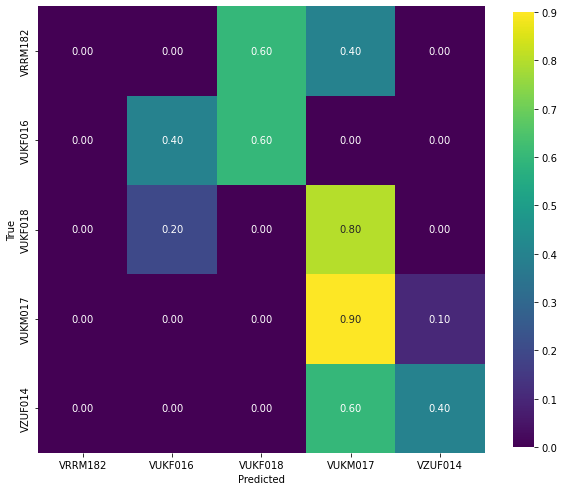

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
cf, ax = evaluate_performance.conf_matrix(
    y=y_test_mx[idxs_mx], yp=cpred_mx, labels=individuals_test, ax=ax
)
fig.savefig("code/context_analysis/results/random_forests/di/cf_mx.png")

### ROC and AUC score on DI test

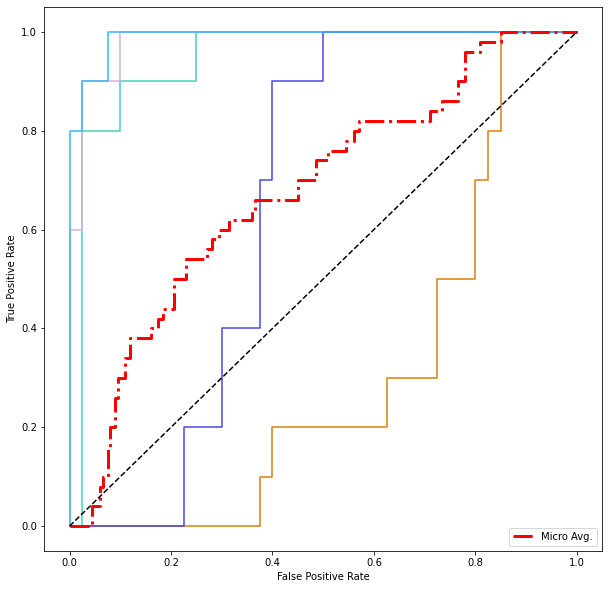

AUC score 0.775


In [34]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
auc, ax = evaluate_performance.roc_auc(
    y=y_test[idxs], y_true=feature_extraction.one_hot(y_test[idxs]),
    y_score=cprobs, n_classes=len(individuals_test), ax=ax
)
fig.savefig("code/context_analysis/results/random_forests/di/roc.png")
print(f"AUC score {auc:.3f}")

### Metrics on SC test

In [35]:
metr_sc, _, _ = evaluate_performance.metrics(
    y=y_test_sc[idxs_sc], yp=cpred_sc,
    y_true=feature_extraction.one_hot(y_test_sc[idxs_sc]),
    y_pred=feature_extraction.one_hot(cpred_sc, num_classes=len(np.unique(y_test_sc[idxs]))),
    labels=individuals_test
)
mcc = evaluate_performance.matthews(y=y_test_sc[idxs], yp=cpred_sc)

print(f"MCC: {mcc:.3f}")
metr_sc

MCC: 0.246


C:\Users\alessandro\anaconda3\envs\thesis\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alessandro\anaconda3\envs\thesis\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Label  Precision  Recall
0     VRRM182   0.000000    0.00
1     VUKF016   0.000000    0.00
2     VUKF018   0.000000    0.00
3     VUKM017   0.307692    0.80
4     VZUF014   0.500000    0.40
5  Macro Avg.   0.161538    0.24

## Context = SC

In [36]:
# random forest
pred = [] # DI
probs = []

pred_sc = [] # SC
probs_sc = []

pred_mx = [] # mixed
probs_mx = []

for i in range(10):

    # load in batches the spectrograms
    X_train, _ = feature_extraction.spec_img(
        specs_dB = None, sample_rates=None, metadata_df=train_sc.iloc[idxs_train_sc[i]], directory=None, created=True
    )

    # reshaping
    X_train = np.reshape(X_train, newshape=(X_train.shape[0], X_train.shape[1]*X_train.shape[2]*X_train.shape[3]))
    
    # training
    rf = algorithms.RandForest(random_state=i+76, do_umap=False)
    rf.fit(X=X_train, y=y_train_sc[idxs_train_sc[i]])

    # evaluation DI
    X_test, _ = feature_extraction.spec_img(
        specs_dB = None, sample_rates=None, metadata_df=test.iloc[idxs_test[i]], directory=None, created=True
    ) # DI

    X_test = np.reshape(X_test, newshape=(X_test.shape[0], X_test.shape[1]*X_test.shape[2]*X_test.shape[3]))

    tmp_pred, tmp_prob = rf.predict(X=X_test)

    pred.append(tmp_pred)
    probs.append(tmp_prob)

    # evaluation SC
    X_test, _ = feature_extraction.spec_img(
        specs_dB = None, sample_rates=None, metadata_df=test_sc.iloc[idxs_test_sc[i]], directory=None, created=True
    ) # SC

    X_test = np.reshape(X_test, newshape=(X_test.shape[0], X_test.shape[1]*X_test.shape[2]*X_test.shape[3]))

    tmp_pred, tmp_prob = rf.predict(X=X_test)

    pred_sc.append(tmp_pred)
    probs_sc.append(tmp_prob)

    # evaluation mixed
    X_test, _ = feature_extraction.spec_img(
        specs_dB = None, sample_rates=None, metadata_df=test_mx.iloc[idxs_test_mx[i]], directory=None, created=True
    ) # mixed

    X_test = np.reshape(X_test, newshape=(X_test.shape[0], X_test.shape[1]*X_test.shape[2]*X_test.shape[3]))

    tmp_pred, tmp_prob = rf.predict(X=X_test)

    pred_mx.append(tmp_pred)
    probs_mx.append(tmp_prob)

    

# to arrays
pred = np.array(pred)
pred_sc = np.array(pred_sc)
pred_mx = np.array(pred_mx)

probs = np.array(probs)
probs_sc = np.array(probs_sc)
probs_mx = np.array(probs_mx)

# reshaping
pred = np.reshape(pred, newshape=(pred.shape[1]*10))
pred_sc = np.reshape(pred_sc, newshape=(pred_sc.shape[1]*10))
pred_mx = np.reshape(pred_mx, newshape=(pred_mx.shape[1]*10))

probs = np.reshape(probs, 
    newshape=(probs.shape[1]*10, probs.shape[2]))
probs_sc = np.reshape(probs_sc, 
    newshape=(probs_sc.shape[1]*10, probs_sc.shape[2]))
probs_mx = np.reshape(probs_mx, 
    newshape=(probs_mx.shape[1]*10, probs_mx.shape[2]))

In [37]:
try:
    os.mkdir("code/context_analysis/results/random_forests/sc")
except FileExistsError:
    pass

# save variables
d = {
    "pred": pred,
    "pred_sc": pred_sc,
    "pred_mx": pred_mx,
    "probs": probs,
    "probs_sc": probs_sc,
    "probs_mx": probs_mx,
    "individuals_test": individuals_test
}

with open("code/context_analysis/results/random_forests/sc/vars.p", "wb") as fb:
    pickle.dump(d,  fb, protocol=pickle.HIGHEST_PROTOCOL)

### Confusion Matrix for test on mixed test

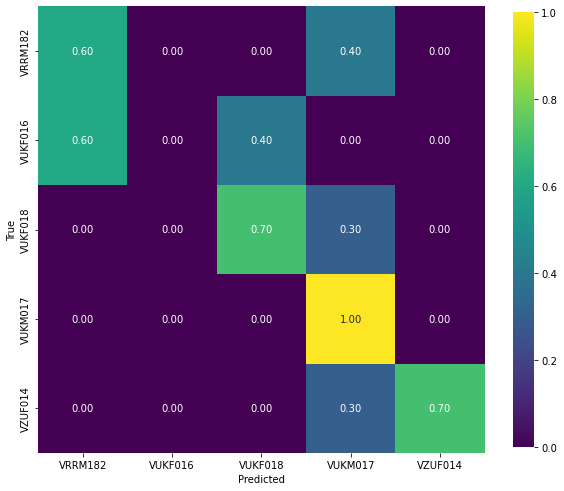

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
cf, ax = evaluate_performance.conf_matrix(
    y=y_test_mx[idxs_mx], yp=pred_mx, labels=individuals_test, ax=ax
)
fig.savefig("code/context_analysis/results/random_forests/sc/cf_mx.png")

### ROC and AUC score on SC-FO test

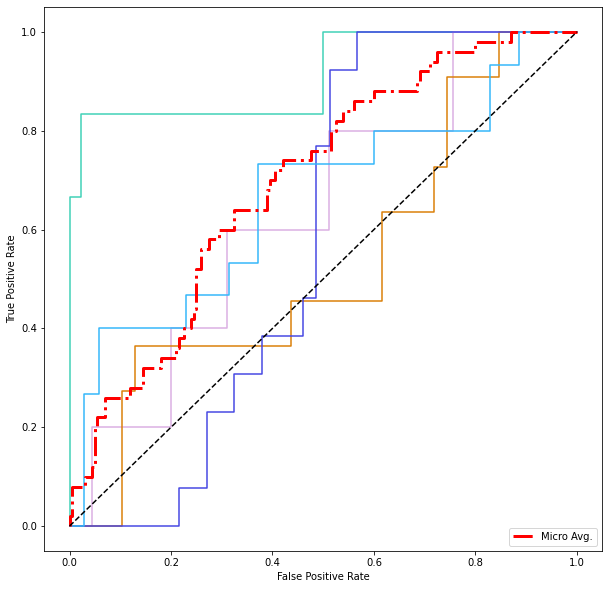

AUC score 0.796


In [39]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
auc, ax = evaluate_performance.roc_auc(
    y=y_test_sc[idxs_sc], y_true=feature_extraction.one_hot(y_test_sc[idxs]),
    y_score=probs_sc, n_classes=len(individuals_test), ax=ax
)
fig.savefig("code/context_analysis/results/random_forests/sc/roc_sc.png")
print(f"AUC score {auc:.3f}")

### Metrics on DI test

In [40]:
metr, _, _ = evaluate_performance.metrics(
    y=y_test[idxs], yp=pred,
    y_true=feature_extraction.one_hot(y_test[idxs]),
    y_pred=feature_extraction.one_hot(pred, num_classes=len(np.unique(y_test[idxs]))),
    labels=individuals_test
)
mcc = evaluate_performance.matthews(y=y_test[idxs], yp=pred)

print(f"MCC: {mcc:.3f}")
metr

MCC: 0.324


Label  Precision  Recall
0     VRRM182   0.416667    0.50
1     VUKF016   1.000000    0.40
2     VUKF018   0.000000    0.00
3     VUKM017   0.375000    0.90
4     VZUF014   1.000000    0.40
5  Macro Avg.   0.558333    0.44

## Context = mixed

In [41]:
# random forest
cpred = [] # DI
cprobs = []

cpred_sc = [] # SC
cprobs_sc = []

cpred_mx = [] # mixed
cprobs_mx = []

for i in range(10):

    # load in batches the spectrograms
    X_train, _ = feature_extraction.spec_img(
        specs_dB = None, sample_rates=None, metadata_df=train_mx.iloc[idxs_train_mx[i]], directory=None, created=True
    )

    # reshaping
    X_train = np.reshape(X_train, newshape=(X_train.shape[0], X_train.shape[1]*X_train.shape[2]*X_train.shape[3]))
    
    # training
    rf = algorithms.RandForest(random_state=i+76, do_umap=False)
    rf.fit(X=X_train, y=y_train_mx[idxs_train_mx[i]])

    # evaluation DI
    X_test, _ = feature_extraction.spec_img(
        specs_dB = None, sample_rates=None, metadata_df=test.iloc[idxs_test[i]], directory=None, created=True
    ) # DI

    X_test = np.reshape(X_test, newshape=(X_test.shape[0], X_test.shape[1]*X_test.shape[2]*X_test.shape[3]))

    tmp_pred, tmp_prob = rf.predict(X=X_test)

    cpred.append(tmp_pred)
    cprobs.append(tmp_prob)

    # evaluation SC
    X_test, _ = feature_extraction.spec_img(
        specs_dB = None, sample_rates=None, metadata_df=test_sc.iloc[idxs_test_sc[i]], directory=None, created=True
    ) # SC

    X_test = np.reshape(X_test, newshape=(X_test.shape[0], X_test.shape[1]*X_test.shape[2]*X_test.shape[3]))

    tmp_pred, tmp_prob = rf.predict(X=X_test)

    cpred_sc.append(tmp_pred)
    cprobs_sc.append(tmp_prob)

    # evaluation mixed
    X_test, _ = feature_extraction.spec_img(
        specs_dB = None, sample_rates=None, metadata_df=test_mx.iloc[idxs_test_mx[i]], directory=None, created=True
    ) # mixed

    X_test = np.reshape(X_test, newshape=(X_test.shape[0], X_test.shape[1]*X_test.shape[2]*X_test.shape[3]))

    tmp_pred, tmp_prob = rf.predict(X=X_test)

    cpred_mx.append(tmp_pred)
    cprobs_mx.append(tmp_prob)

    

# to arrays
cpred = np.array(cpred)
cpred_sc = np.array(cpred_sc)
cpred_mx = np.array(cpred_mx)

cprobs = np.array(cprobs)
cprobs_sc = np.array(cprobs_sc)
cprobs_mx = np.array(cprobs_mx)

# reshaping
cpred = np.reshape(cpred, newshape=(cpred.shape[1]*10))
cpred_sc = np.reshape(cpred_sc, newshape=(cpred_sc.shape[1]*10))
cpred_mx = np.reshape(cpred_mx, newshape=(cpred_mx.shape[1]*10))

cprobs = np.reshape(cprobs, 
    newshape=(cprobs.shape[1]*10, cprobs.shape[2]))
cprobs_sc = np.reshape(cprobs_sc, 
    newshape=(cprobs_sc.shape[1]*10, cprobs_sc.shape[2]))
cprobs_mx = np.reshape(cprobs_mx, 
    newshape=(cprobs_mx.shape[1]*10, cprobs_mx.shape[2]))

In [42]:
try:
    os.mkdir("code/context_analysis/results/random_forests/mx")
except FileExistsError:
    pass

# save variables
d = {
    "pred": cpred,
    "pred_sc": cpred_sc,
    "pred_mx": cpred_mx,
    "probs": cprobs,
    "probs_sc": cprobs_sc,
    "probs_mx": cprobs_mx,
    "individuals_test": individuals_test
}

with open("code/context_analysis/results/random_forests/mx/vars.p", "wb") as fb:
    pickle.dump(d,  fb, protocol=pickle.HIGHEST_PROTOCOL)